# UBS Challange

In [2]:
import pandas as pd
import numpy as np
import os

path = os.path.join(os.path.join(os.getcwd(), os.pardir),"data")
print(path)

c:\Users\Usee\Documents\Datathon_24\datathon\src\..\data


In [3]:
file = os.path.join(path, "skylab_instagram_datathon_dataset.csv")
data = pd.read_csv(file, delimiter=";")
print(data.describe())

          followers       pictures         videos      comments         likes
count  5.792580e+05  695803.000000  684349.000000  6.953430e+05  6.959770e+05
mean   1.342432e+07     344.272540      61.244426  3.043246e+04  2.163189e+06
std    1.106975e+08    2777.396873     564.468480  2.766459e+05  1.803193e+07
min    0.000000e+00       0.000000       0.000000  0.000000e+00  0.000000e+00
25%    3.013372e+05      19.000000       2.000000  3.710000e+02  1.727700e+04
50%    1.104144e+06      44.000000       7.000000  1.435000e+03  9.318400e+04
75%    4.479325e+06     122.000000      20.000000  5.872000e+03  4.577470e+05
max    3.502565e+09  141746.000000   35905.000000  1.732046e+07  7.120711e+08


# Explore Companies

number companies:  54


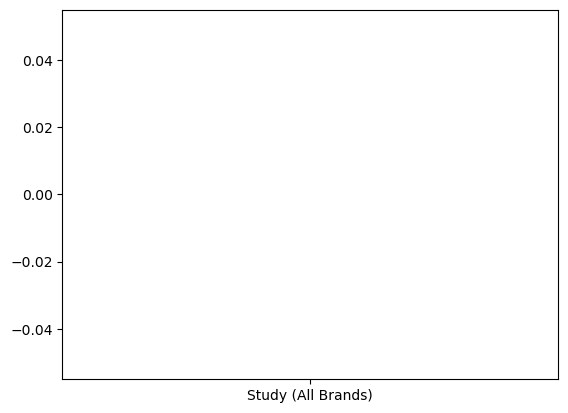

                                     entries   na
Global Luxury Analysts Interest List   29233  NaN
Beauty & Boutique                      44266  NaN
Luxury & Premium & Mainstream          64541  NaN
Apparel Retail                         69341  NaN
US Softlines Analyst Interest List    113744  NaN


In [8]:
import matplotlib.pyplot as plt

def count_entries(data: pd.DataFrame, column: str):
    cats = list(set(list(data["compset"])))
    print("number companies: ", len(cats))

    table = pd.DataFrame(columns=["entries", "na"], index=cats)
    for company in cats:
        data_company = data[data["compset"] == company]
        table.loc[company, "entries"] = len(data_company)
    table = table.sort_values(by=["entries"])
    return table

table = count_entries(data=data, column="compset")
plt.plot(table["na"])
plt.show()
print(table[-5:])

In [42]:
def calculate_yearly_means(df, col, category_column, category_value, period: str="yearly"):
    filtered_df = df[df[category_column] == category_value]
    
    # Convert the index to datetime if it's not already
    if period == "yearly":
        filtered_df["time"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
    elif period == "montly":
        filtered_df["time"] = pd.to_datetime(filtered_df["period_end_date"]).dt.month

    yearly_means = filtered_df[col].groupby(filtered_df["time"]).mean()
    
    return yearly_means

print(calculate_yearly_means(data, "followers", "compset", "Soft Luxury", period="yearly"))

time
2015    4.352819e+06
2016    8.192623e+06
2017    1.173550e+07
2018    1.491700e+07
2019    1.874780e+07
2020    2.167687e+07
2021    2.375165e+07
2022    2.632273e+07
2023    2.881174e+07
Name: followers, dtype: float64


C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\291521671.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["time"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year


In [41]:
def average_table(df, category_column, interesting_period, period: str="yearly"):
    cols = ["pictures", "videos", "comments", "likes", "followers"] 
    cats = df[category_column].unique()
    table = pd.DataFrame(columns=cols, index=cats)
    
    if period == "yearly":
        df["time"] = pd.to_datetime(df["period_end_date"]).dt.year
    elif period == "montly":
        df["time"] = pd.to_datetime(df["period_end_date"]).dt.month

    df = df[df["time"] == interesting_period]

    for cat in cats:
        df_cat = df[df[category_column] == cat]
        for col in cols:
            table.loc[cat, col] = np.nanmean(df_cat[col])
    
    return table

table = average_table(data, "compset", 2018) 

                                          pictures        videos  \
Soft Luxury                             100.898927     21.023256   
Luxury & Premium & Mainstream           147.835342     23.605246   
US Softlines Analyst Interest List      655.810912     86.495847   
Global Luxury Analysts Interest List    102.779965     21.369565   
Coffee                                  542.046154    106.223077   
Restaurants                             406.061538     84.597115   
Beverages                               137.266554     87.527181   
Sports drinks                            61.721154     22.365385   
Energy drinks                           393.217949    400.089744   
Fast Fashion                            407.869838      31.77189   
Omnichannel Apparel Retail              424.611925     41.351833   
Apparel Retail                          281.098525     26.166294   
US Department Store                     169.124324     26.857658   
Latam Apparel Retail                    130.7596

C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\2763886763.py:16: RuntimeWarning: Mean of empty slice
  table.loc[cat, col] = np.nanmean(df_cat[col])


In [ ]:

def table_yearly_means(df, col, category_column, period="yearly"):
    unique_categories = df[category_column].unique()
    
    yearly_means_all = []  

    for category_value in unique_categories:
        yearly_means = calculate_yearly_means(df, col, category_column, category_value, period=period)
        yearly_means['Category'] = category_value
        
        # Append the results to the DataFrame
        yearly_means_all.append(yearly_means)

    return pd.DataFrame(yearly_means_all)

mean_table = table_yearly_means(df=data,  col="followers", category_column="compset", period="yearly")
print(mean_table)